In [11]:
from HelperFunctions import *
import time
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [12]:
resultsfull = pickle.load(open('SPOresultsAllVars.pkl','rb')).unstack().stack(0).droplevel(['grid_dim'])
resultsfull['SPO diff'] = 100*(resultsfull['SPO_loss_SGD'] - resultsfull['SPO_loss_direct'])/resultsfull['SPO_loss_direct']
resultsfull['SPO+ diff'] = 100*(resultsfull['SPO_plus_loss_SGD'] - resultsfull['SPO_plus_loss_direct'])/resultsfull['SPO_plus_loss_direct']

## Relative loss plot

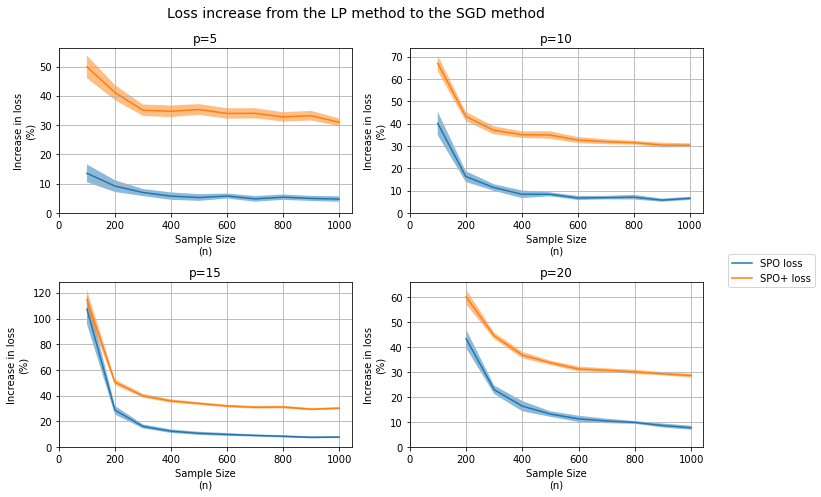

In [71]:
fig, axes = plt.subplots(2,2, figsize=(10,7))

pvals=[5,10,15,20]
for i,pval in enumerate(pvals):
    results=resultsfull[(resultsfull.reset_index()['p']==pval).values].droplevel(['p']).copy()
    
    lossdiffs = results[['SPO diff','SPO+ diff']]
    if pval==20:
        lossdiffs=lossdiffs[(lossdiffs.reset_index()['n']>100).values]
    lossmeans = lossdiffs.groupby('n').mean()
    lossSD = lossdiffs.groupby('n').std()
    lossLB = lossmeans - 1.96 * lossSD / np.sqrt(30) #95% confidence interval for the mean
    lossUB = lossmeans + 1.96 * lossSD / np.sqrt(30) #95% confidence interval for the mean
    
    
    ax=axes[i//2,i%2]

    ax.plot(lossmeans.index,lossmeans['SPO diff'], label='SPO loss')
    ax.fill_between(lossmeans.index,lossLB['SPO diff'],lossUB['SPO diff'], alpha=0.5)

    ax.plot(lossmeans.index,lossmeans['SPO+ diff'], label='SPO+ loss')
    ax.fill_between(lossmeans.index,lossLB['SPO+ diff'],lossUB['SPO+ diff'], alpha=0.5)

    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.set_xlabel('Sample Size\n(n)')
    ax.set_ylabel('Increase in loss\n(%)')

    ax.set_title(f'p={pval}')
    ax.grid()
fig.suptitle('Loss increase from the LP method to the SGD method', fontsize=14)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.4,1.2))
plt.savefig('Plots/RelativeLoss.png')

## Absolute loss plot

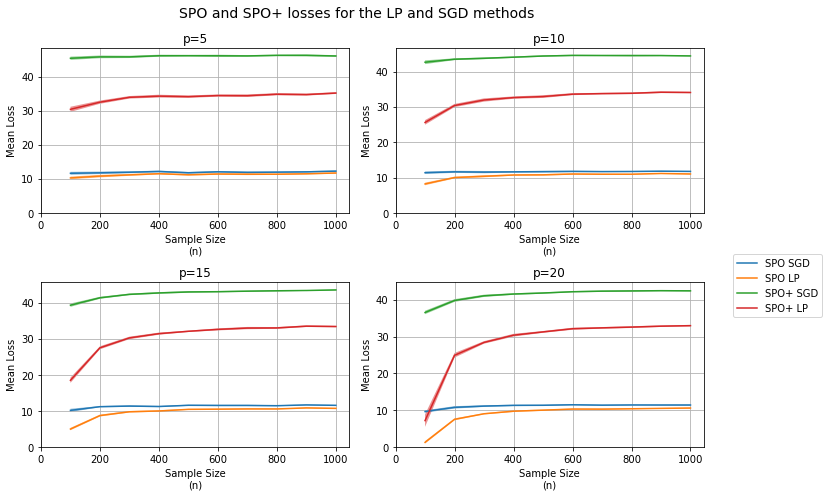

In [72]:
fig, axes = plt.subplots(2,2, figsize=(10,7))

pvals=[5,10,15,20]
for i,pval in enumerate(pvals):
    results=resultsfull[(resultsfull.reset_index()['p']==pval).values].droplevel(['p']).copy()
    
    lossdiffs = results[['SPO_loss_SGD','SPO_loss_direct','SPO_plus_loss_SGD','SPO_plus_loss_direct']]
    #if pval==20:
    #    lossdiffs=lossdiffs[(lossdiffs.reset_index()['n']>100).values]
    lossmeans = lossdiffs.groupby('n').mean()
    lossSD = lossdiffs.groupby('n').std()
    lossLB = lossmeans - 1.96 * lossSD / np.sqrt(30) #95% confidence interval for the mean
    lossUB = lossmeans + 1.96 * lossSD / np.sqrt(30) #95% confidence interval for the mean
    
    
    ax=axes[i//2,i%2]

    ax.plot(lossmeans.index,lossmeans['SPO_loss_SGD'], label='SPO SGD')
    ax.fill_between(lossmeans.index,lossLB['SPO_loss_SGD'],lossUB['SPO_loss_SGD'], alpha=0.5)

    ax.plot(lossmeans.index,lossmeans['SPO_loss_direct'], label='SPO LP')
    ax.fill_between(lossmeans.index,lossLB['SPO_loss_direct'],lossUB['SPO_loss_direct'], alpha=0.5)
    
    ax.plot(lossmeans.index,lossmeans['SPO_plus_loss_SGD'], label='SPO+ SGD')
    ax.fill_between(lossmeans.index,lossLB['SPO_plus_loss_SGD'],lossUB['SPO_plus_loss_SGD'], alpha=0.5)
    
    ax.plot(lossmeans.index,lossmeans['SPO_plus_loss_direct'], label='SPO+ LP')
    ax.fill_between(lossmeans.index,lossLB['SPO_plus_loss_direct'],lossUB['SPO_plus_loss_direct'], alpha=0.5)

    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.set_xlabel('Sample Size\n(n)')
    ax.set_ylabel('Mean Loss')

    ax.set_title(f'p={pval}')
    ax.grid()
fig.suptitle('SPO and SPO+ losses for the LP and SGD methods', fontsize=14)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.4,1.2))
plt.savefig('Plots/AbsoluteLoss.png')

## Runtime plot

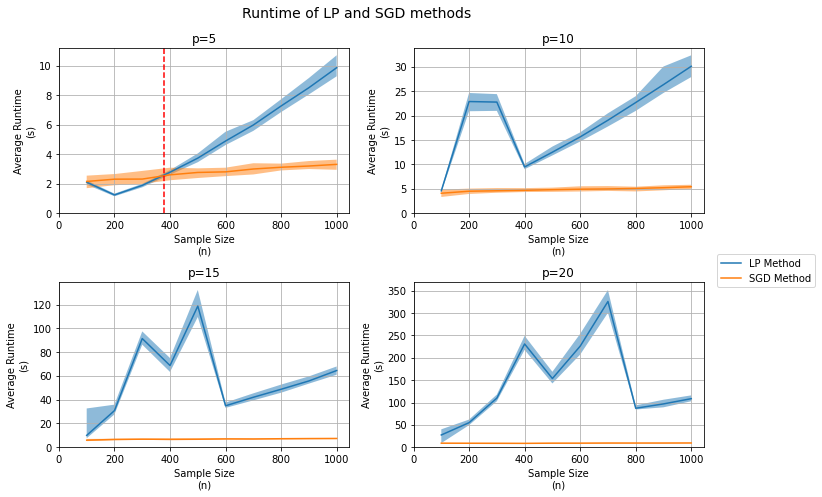

In [73]:
fig, axes = plt.subplots(2,2, figsize=(10,7))

pvals=[5,10,15,20]
for i,pval in enumerate(pvals):
    results=resultsfull[(resultsfull.reset_index()['p']==pval).values].droplevel(['p']).copy()
    
    runtimes = results[['direct_runtime','SGD_runtime']]
    runtimemeans = runtimes.groupby('n').mean()
    runtimeSD = runtimes.groupby('n').std()
    runtimeUB = runtimes.groupby('n').quantile(0.975)
    runtimeLB = runtimes.groupby('n').quantile(0.025)
    
    
    ax=axes[i//2,i%2]

    ax.plot(runtimemeans.index,runtimemeans['direct_runtime'], label='LP Method')
    ax.fill_between(runtimemeans.index,runtimeLB['direct_runtime'],runtimeUB['direct_runtime'], alpha=0.5)

    ax.plot(runtimemeans.index,runtimemeans['SGD_runtime'], label='SGD Method')
    ax.fill_between(runtimemeans.index,runtimeLB['SGD_runtime'],runtimeUB['SGD_runtime'], alpha=0.5)
    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.set_xlabel('Sample Size\n(n)')
    ax.set_ylabel('Average Runtime\n(s)')

    ax.grid()
    ax.set_title(f'p={pval}')
    if pval==5:
        ax.axvline(380,c='r',linestyle='--')

fig.suptitle('Runtime of LP and SGD methods',fontsize=14)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.4,1.2))
plt.savefig('Plots/Runtime.png')

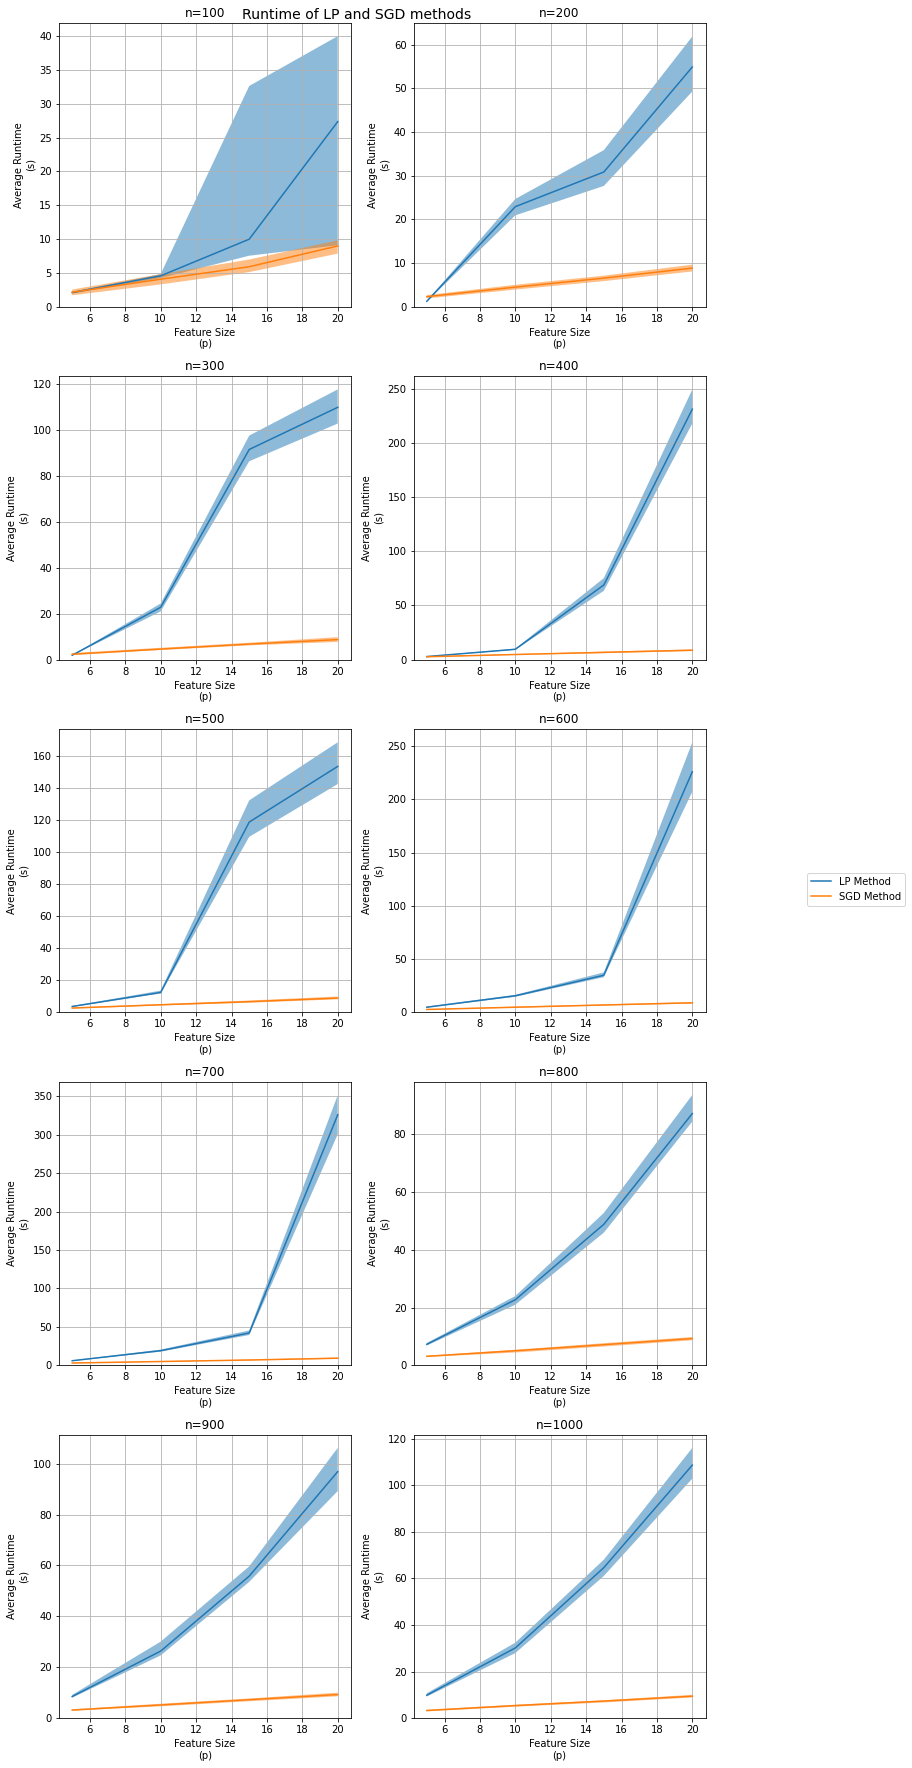

In [96]:
fig, axes = plt.subplots(5,2, figsize=(10,25))

nvals=[100,200,300,400,500,600,700,800,900,1000]
for i,nval in enumerate(nvals):
    results=resultsfull[(resultsfull.reset_index()['n']==nval).values].droplevel(['n']).copy()
    
    runtimes = results[['direct_runtime','SGD_runtime']]
    runtimemeans = runtimes.groupby('p').mean()
    runtimeSD = runtimes.groupby('p').std()
    runtimeUB = runtimes.groupby('p').quantile(0.975)
    runtimeLB = runtimes.groupby('p').quantile(0.025)
    
    
    ax=axes[i//2,i%2]

    ax.plot(runtimemeans.index,runtimemeans['direct_runtime'], label='LP Method')
    ax.fill_between(runtimemeans.index,runtimeLB['direct_runtime'],runtimeUB['direct_runtime'], alpha=0.5)

    ax.plot(runtimemeans.index,runtimemeans['SGD_runtime'], label='SGD Method')
    ax.fill_between(runtimemeans.index,runtimeLB['SGD_runtime'],runtimeUB['SGD_runtime'], alpha=0.5)
    ax.set_ylim(0)
    ax.set_xlabel('Feature Size\n(p)')
    ax.set_ylabel('Average Runtime\n(s)')

    ax.grid()
    ax.set_title(f'n={nval}')
    if pval==5:
        ax.axvline(380,c='r',linestyle='--')

fig.suptitle('Runtime of LP and SGD methods',fontsize=14)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.7,3))

plt.savefig('Plots/RuntimeP.png')